In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

/Users/sohrab/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
v1 = tf.Variable(tf.constant(2.0, shape=[4]), dtype='float32')
print(v1)

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([2., 2., 2., 2.], dtype=float32)>


2023-05-22 19:09:25.854363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
v2 = tf.Variable(np.ones(shape=[4,3]), dtype='float32')
print(v2)

<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


In [4]:
v3 = tf.Variable(tf.keras.initializers.RandomNormal()(shape=[3,4,5]), dtype='float32')
print(v3)

<tf.Variable 'Variable:0' shape=(3, 4, 5) dtype=float32, numpy=
array([[[ 0.07038363, -0.04776675, -0.10049842,  0.01458121,
         -0.01023538],
        [ 0.03586813,  0.02120703,  0.03561521,  0.06895933,
         -0.02230707],
        [-0.03272625,  0.00514175, -0.0202509 ,  0.04325278,
          0.00815599],
        [ 0.00950692,  0.03521289,  0.04056086,  0.03299719,
          0.0386394 ]],

       [[ 0.00687491, -0.06113284, -0.0541414 ,  0.03059524,
          0.03131999],
        [-0.10157813,  0.01916096, -0.00510716,  0.0695784 ,
          0.0434598 ],
        [-0.02281577,  0.09796121, -0.06183766,  0.03205871,
         -0.00753121],
        [ 0.02845312,  0.04120246,  0.05288136,  0.08101867,
          0.04122792]],

       [[ 0.16030979,  0.08621685,  0.04192119,  0.02786135,
          0.02376696],
        [-0.03942319,  0.03917163, -0.00048957,  0.07904264,
         -0.05427688],
        [ 0.09777842, -0.071792  ,  0.0242676 , -0.0164829 ,
         -0.01248307],
        

In [5]:
v = tf.Variable(np.zeros(shape=[4,3]), dtype='float32')
v = v[0,2].assign(1)
v = v[2:, :2].assign([[3,3], [3,3]])
print(v)

<tf.Variable 'UnreadVariable' shape=(4, 3) dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 0., 0.],
       [3., 3., 0.],
       [3., 3., 0.]], dtype=float32)>


In [6]:
b = v * 3
print(b)

tf.Tensor(
[[0. 0. 3.]
 [0. 0. 0.]
 [9. 9. 0.]
 [9. 9. 0.]], shape=(4, 3), dtype=float32)


In [8]:
assert isinstance(b, tf.Tensor)
print(type(b).__name__)

EagerTensor


In [9]:
v3 = tf.Variable(np.random.normal(size=[4,1,5]), dtype=tf.float32)
print(v3)

<tf.Variable 'Variable:0' shape=(4, 1, 5) dtype=float32, numpy=
array([[[-0.41791576, -0.7128802 , -1.0392742 ,  0.4424192 ,
          0.25869173]],

       [[ 0.88651925, -1.2950828 ,  0.868177  , -0.21287745,
          0.348026  ]],

       [[ 0.8667949 , -0.7117546 ,  0.00278987, -0.6625443 ,
          0.23823164]],

       [[ 0.5729973 ,  1.3500164 , -2.176317  , -0.29325363,
         -0.8633858 ]]], dtype=float32)>


In [64]:
x_rgb = np.array(Image.open('animal.jpeg')).astype('float32')

x_rgb = tf.constant(x_rgb)

grays = tf.constant([[0.3], [0.59], [0.11]])

x = tf.matmul(x_rgb, grays)

x = tf.squeeze(x)
print("The size of the picture: ", x.shape)


The size of the picture:  (512, 512)


(-0.5, 511.5, 511.5, -0.5)

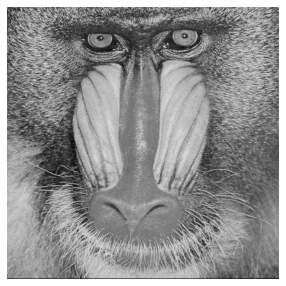

In [11]:
f, axes = plt.subplots(1,1, figsize=(5,5))

axes.imshow(x.numpy(),cmap='gray')
axes.axis('off')

# Convolution operation

In [66]:
y = tf.constant(x)

f = tf.Variable(np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]).astype('float32'))

y_reshaped = tf.reshape(y, [1,512,512,1])

f_reshaped = tf.reshape(f, [3,3,1,1])
y_conv = tf.nn.convolution(y_reshaped, f_reshaped)
def improve_contrast(x, n=3):
    return np.clip(x*n, np.min(x), np.max(x))

y_conv_clipped = improve_contrast(y_conv, 4)
print(y_conv.shape)

(1, 510, 510, 1)


Text(0.5, 1.0, 'Result after Edge Detection')

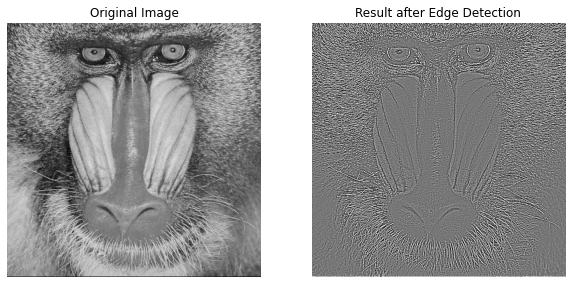

In [13]:
f, axes = plt.subplots(1,2, figsize=(10,10))

axes[0].imshow(np.squeeze(x.numpy()),cmap='gray')
axes[1].imshow(np.squeeze(y_conv_clipped),cmap='gray')

axes[0].axis('off')
axes[0].set_title('Original Image')
axes[1].axis('off')
axes[1].set_title('Result after Edge Detection')

# Exercise

In [86]:

x_rgb = tf.constant(np.random.rand(256, 256, 3).astype('float32'))

grays = tf.constant([[0.3], [0.59], [0.11]])

x = tf.matmul(x_rgb, grays)

x = tf.squeeze(x)
y = tf.constant(x)
f = tf.Variable(np.random.rand(5, 5).astype('float32'))

y_reshaped = tf.reshape(y, [1,256,256,1])
f_reshaped = tf.reshape(f, [5,5,1,1])

y_conv = tf.nn.convolution(y_reshaped, f_reshaped)

print(y_conv.shape)

(1, 252, 252, 1)
